**IMPORTING LIBRARIES AND LOADING DATA**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
df = pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
891    False
892    False
893    False
894    False
895    False
Length: 896, dtype: bool

**EXPLORATORY DATA ANALYSIS**

In [7]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [8]:
df['total_monthly_customers_count'] = df['Daily_Customer_Count'] * 30
df['avg_customer_spend_day'] = df['Store_Sales'] / df['total_monthly_customers_count']
df['avg_customer_spend_month'] = df['Store_Sales'] / df['Daily_Customer_Count']
df['avg_daily_sales'] = df['Store_Sales'] / 30


In [9]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_daily_sales
0,1,1659,1961,530,66490,15900,4.181761,125.452830,2216.333333
1,2,1461,1752,210,39820,6300,6.320635,189.619048,1327.333333
2,3,1340,1609,720,54010,21600,2.500463,75.013889,1800.333333
3,4,1451,1748,620,53730,18600,2.888710,86.661290,1791.000000
4,5,1770,2111,450,46620,13500,3.453333,103.600000,1554.000000


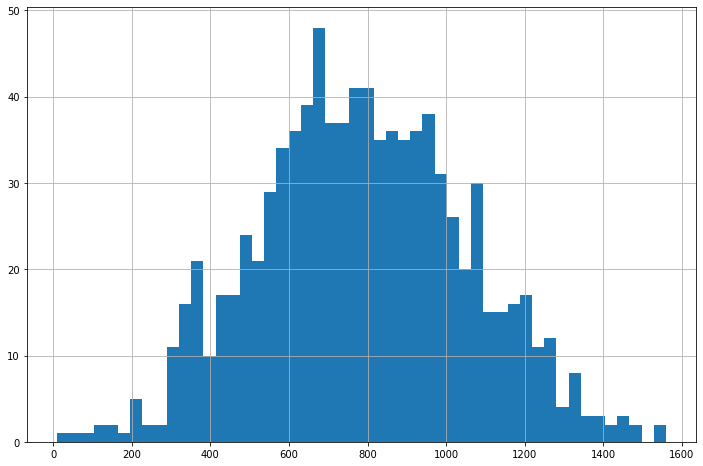

In [10]:
import matplotlib.pyplot as plt
df.Daily_Customer_Count.hist(bins = 50, figsize=(12,8))
plt.show()

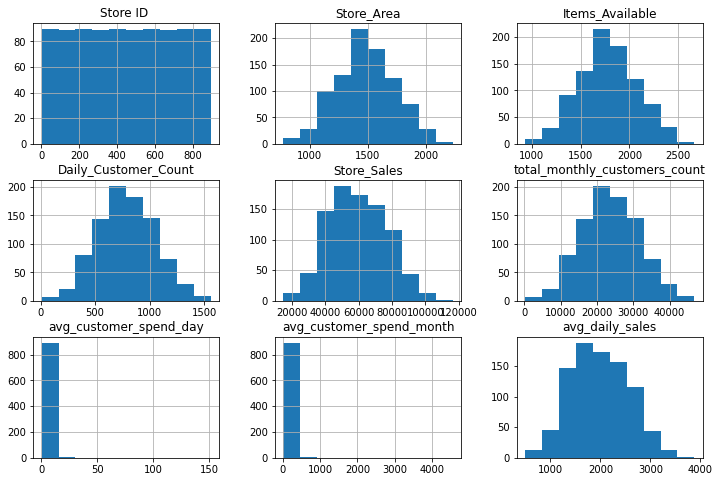

In [11]:
df.hist(figsize=(12,8));
plt.grid(False)

In [12]:
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

avg_daily_sales                  1.000000
Store_Sales                      1.000000
avg_customer_spend_day           0.139546
avg_customer_spend_month         0.139546
Items_Available                  0.098849
Store_Area                       0.097474
Store ID                         0.071486
Daily_Customer_Count             0.008629
total_monthly_customers_count    0.008629
Name: Store_Sales, dtype: float64 



Index(['avg_daily_sales', 'Store_Sales', 'avg_customer_spend_day',
       'avg_customer_spend_month', 'Items_Available', 'Store_Area',
       'Store ID ', 'Daily_Customer_Count', 'total_monthly_customers_count'],
      dtype='object')


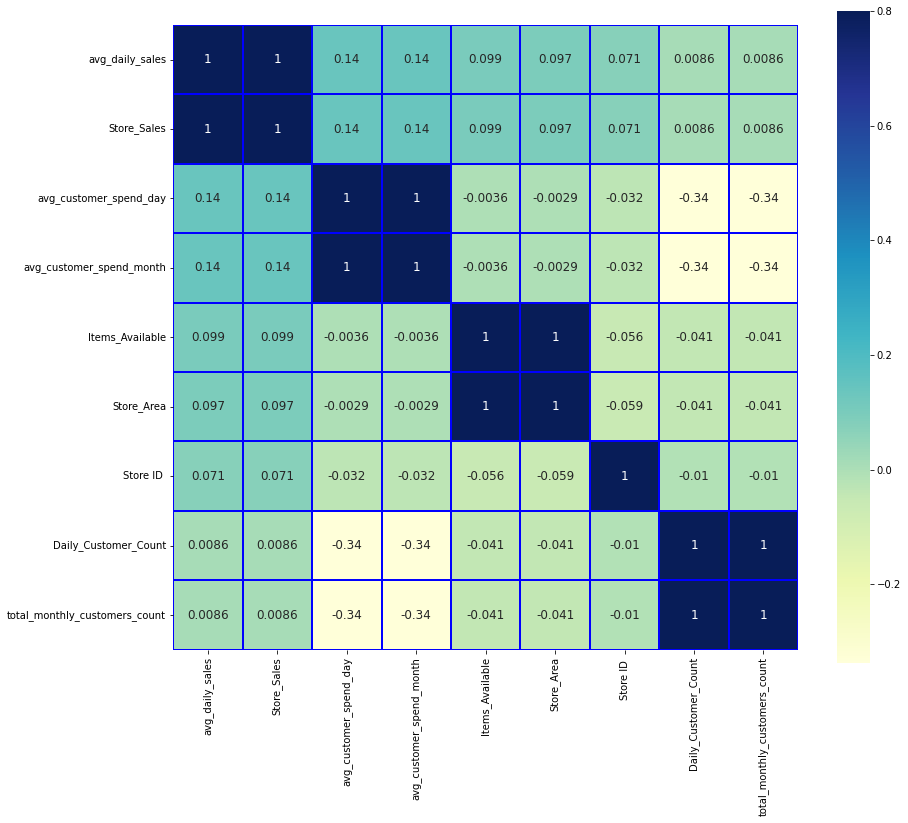

In [13]:
k= 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap="YlGnBu" ,
 linecolor="b",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

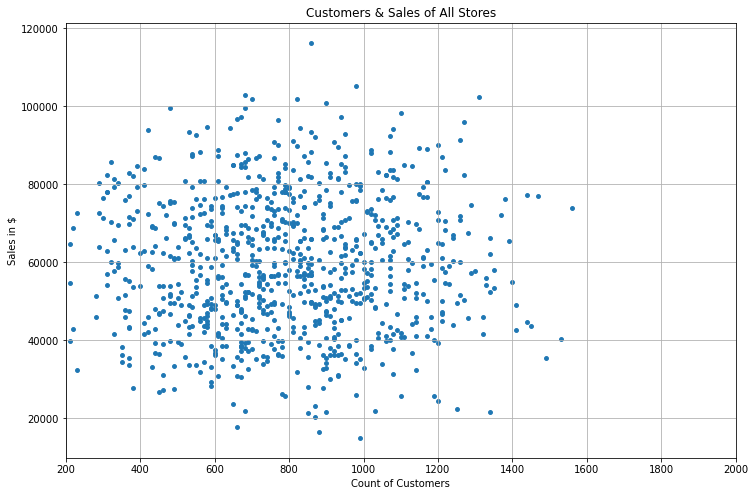

In [14]:
Yfac = df["Store_Sales"]
Xfac = df["Daily_Customer_Count"]
plt.figure(figsize=(12,8))
plt.scatter(Xfac,Yfac,s=15)
plt.xlabel('Count of Customers')
plt.ylabel('Sales in $')
plt.title('Customers & Sales of All Stores')
plt.xlim(200, 2000)
plt.yscale("linear")
plt.grid(True)

[]

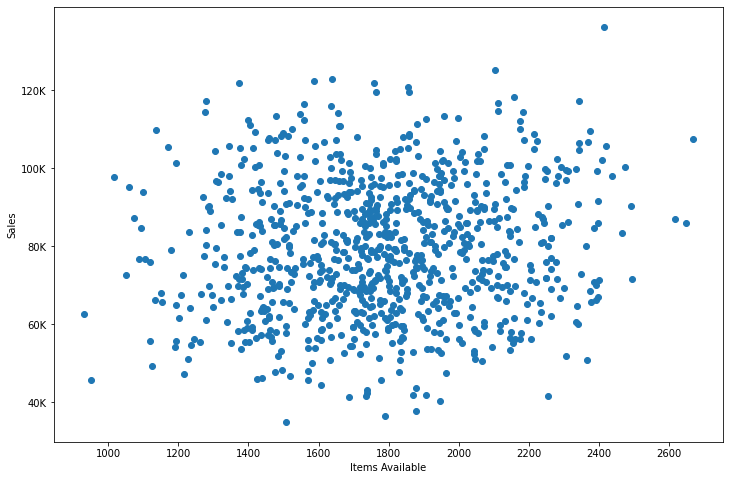

In [15]:
x = df[['Items_Available']]
y = df[['Store_Sales']]
_ = plt.figure(figsize=(12,8))  
_ = plt.scatter(x , y)
_ = plt.xlabel('Items Available')
_ = plt.ylabel('Sales')
_ = plt.xticks(np.arange(0, 2800 , step = 200)) 
_ = plt.yticks(np.arange(0 ,120000 , step = 20000), ['20K' , '40K' , '60K' , '80K' , '100K' , '120K']) 

plt.plot()

In [16]:
df.sort_values('Store_Sales', ascending=False)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_daily_sales
649,650,1989,2414,860,116320,25800,4.508527,135.255814,3877.333333
868,869,1775,2104,980,105150,29400,3.576531,107.295918,3505.000000
432,433,1365,1638,680,102920,20400,5.045098,151.352941,3430.666667
408,409,1303,1587,1310,102310,39300,2.603308,78.099237,3410.333333
758,759,1486,1758,820,101820,24600,4.139024,124.170732,3394.000000
...,...,...,...,...,...,...,...,...,...
352,353,1397,1686,850,21300,25500,0.835294,25.058824,710.000000
593,594,1624,1946,870,20270,26100,0.776628,23.298851,675.666667
775,776,1537,1877,660,17670,19800,0.892424,26.772727,589.000000
852,853,1477,1790,880,16370,26400,0.620076,18.602273,545.666667


**Most of the customers spend less than 10 dollars in a store per day while they spend below 200 dollars in a store per month**

**Upvote if you like it and Please check out my other codes :)**